In [1]:
# signal_btag_pt = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')
# signal_btag_ttmm = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_ttmm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')
# signal_btag_tttm = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

tree = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [2]:
from utils.analysis.tree import Tree
qcd = Tree(get_qcd_enriched('btag_tttm'))

In [22]:
# index of jets sorted by btag
btag_sort_ind = ak.argsort(tree.jet_btag, axis=1, ascending=False)

# index of jets sorted by pt
pt_sort_ind =  ak.argsort(tree.jet_ptRegressed, axis=1, ascending=False)


# six_jet_pt_sorted_by_btag = tree.jet_ptRegressed[btag_sort_ind][:,:6]
# six_jet_pt_sort_ind = ak.argsort(six_jet_pt_sorted_by_btag, axis=1, ascending=False)
# six_jet_pt_sorted_by_btag[six_jet_pt_sort_ind]

<Array [[141, 135, 118, ... 94.8, 51.1, 33.6]] type='55952 * var * float32'>

In [11]:
# jet cut masks
jet1_tight = tree.jet_btag[btag_sort_ind][:,0] > btagWP[2018]['Tight']
jet2_tight = tree.jet_btag[btag_sort_ind][:,1] > btagWP[2018]['Tight']
jet3_tight = tree.jet_btag[btag_sort_ind][:,2] > btagWP[2018]['Tight']
jet3_medium = tree.jet_btag[btag_sort_ind][:,2] > btagWP[2018]['Medium']
jet4_medium = tree.jet_btag[btag_sort_ind][:,3] > btagWP[2018]['Medium']

In [12]:
jet_tight = tree.jet_btag[btag_sort_ind] > btagWP[2018]['Tight']
jet_medium = tree.jet_btag[btag_sort_ind] > btagWP[2018]['Medium']

In [15]:
# events that pass btag cuts [tight, tight, tight, medium]
btag_tttm = jet1_tight & jet2_tight & jet3_tight & jet4_medium

# events that pass btag cuts [tight, tight, medium, medium]
btag_ttmm = jet1_tight & jet2_tight & jet3_medium & jet4_medium

In [56]:
# sort first six jets (sorted by btag) by ptRegressed
six_jet_pt_sorted_by_btag_tttm = tree.jet_ptRegressed[btag_sort_ind][btag_tttm][:,:6]
# index of first six jets (sorted by btag) sorted by pt
six_jet_sorted_by_btag_tttm_sorted_by_pt_ind = ak.argsort(six_jet_pt_sorted_by_btag_tttm, axis=1, ascending=False)
# pt of jets sorted by btag then pt
six_jet_sigID_sorted_by_btag_tttm = tree.jet_signalId[btag_sort_ind][btag_tttm][:,:6][six_jet_sorted_by_btag_tttm_sorted_by_pt_ind]
nfound_selected_b_tttm = ak.sum(six_jet_sigID_sorted_by_btag_tttm > -1, axis=1)
nfound_selected_b_tttm

# sort first six jets (sorted by btag) by ptRegressed
six_jet_pt_sorted_by_btag_ttmm = tree.jet_ptRegressed[btag_sort_ind][btag_ttmm][:,:6]
# index of first six jets (sorted by btag) sorted by pt
six_jet_sorted_by_btag_ttmm_sorted_by_pt_ind = ak.argsort(six_jet_pt_sorted_by_btag_ttmm, axis=1, ascending=False)
# pt of jets sorted by btag then pt
six_jet_sigID_sorted_by_btag_ttmm = tree.jet_signalId[btag_sort_ind][btag_ttmm][:,:6][six_jet_sorted_by_btag_ttmm_sorted_by_pt_ind]
nfound_selected_b_ttmm = ak.sum(six_jet_sigID_sorted_by_btag_ttmm > -1, axis=1)

nfound_selected_b_tttm, nfound_selected_b_ttmm


(<Array [6, 5, 6, 6, 5, 5, ... 4, 6, 4, 5, 5, 5] type='42581 * int64'>,
 <Array [6, 5, 6, 5, 6, 5, ... 4, 6, 4, 5, 5, 5] type='46346 * int64'>)

In [60]:
ak.count(nfound_selected_b_tttm)*tree.scale/tree.cutflow[0], ak.count(nfound_selected_b_ttmm)*tree.scale/tree.cutflow[0]

(0.43229441624365483, 0.4705177664974619)

In [42]:
bins_sixb = np.arange(8)
bins_higgs = np.arange(5)

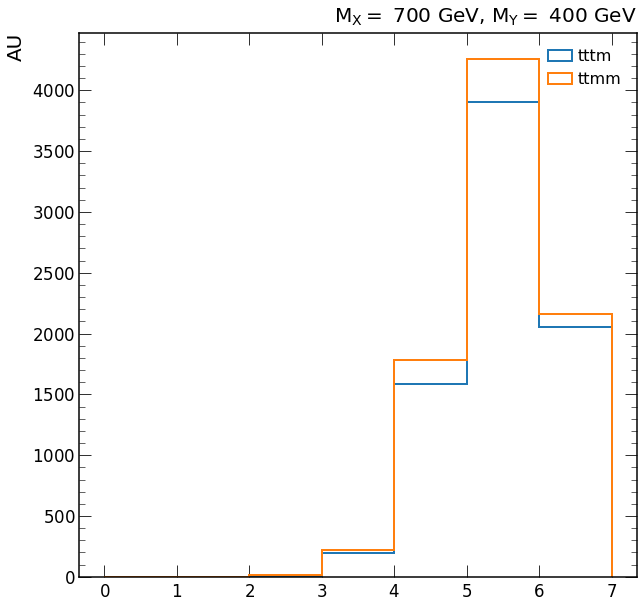

In [43]:
fig, ax = plt.subplots()

_ = tree.hist(nfound_selected_b_tttm, bins=bins_sixb, ax=ax, label='tttm')
_ = tree.hist(nfound_selected_b_ttmm, bins=bins_sixb, ax=ax, label='ttmm')

In [45]:
from utils.analysis.tree import Tree
ttbar_tttm = Tree('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_tttm/TTJets/ntuple.root')

In [55]:
ttbar_tttm.cutflow

array([4.9689344e+07, 1.8308028e+06, 1.4781990e+06, 4.8780504e+04],
      dtype=float32)